In [1]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

from sklearn import datasets, neighbors
from sklearn.model_selection import TimeSeriesSplit
import pickle
import scipy
import time
# =============================================================================================

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Function to pickle in an object.
def openPickleFile(name): #name = the pickle file name, this should be passed as a string inside " ".
    global temp
    temp = pickle.load(open(name + ".pickle","rb"))
    return temp

In [3]:
openPickleFile("y_train")
y_train = temp
print(y_train.shape)
print(y_train.dtype)


(33334,)
object


In [4]:
y_train[y_train == 'positive'] = 1
y_train[y_train == 'negative'] = 0
y_train = y_train.astype(float)
print(y_train.dtype)

float64


In [5]:
openPickleFile("y_test")
y_test = temp
print(y_test.shape)
print(y_test.dtype)


(16666,)
object


In [6]:
y_test[y_test == 'positive'] = 1
y_test[y_test == 'negative'] = 0
y_test = y_test.astype(float)
print(y_test.dtype)

float64


In [7]:
#Function to count no. of unique values in variable of any datatype.
def unique_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack(( unique, count)).T

unique_count(y_train)

array([[0.0000e+00, 4.9490e+03],
       [1.0000e+00, 2.8385e+04]])

#  CV using Bernouli Naive-bayes algorithm.

# 1. CV on Standardized data for Unigrams

### Simple Cross Validation 

In [8]:
openPickleFile("X_train_BOW_unigram")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [9]:
openPickleFile("X_test_BOW_unigram")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [10]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()
from sklearn.naive_bayes import *
from sklearn.naive_bayes import BernoulliNB

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.33)
alpha = [10**i for i in range(-3,6)]

for i in alpha:
    # instantiate learning model (alpha = 30)
    clf = BernoulliNB(alpha=i,binarize=0.0,fit_prior=True,class_prior=None)
    
    #clf = BernoulliNB(alpha=i,binarize=0.1)

    # fitting the model on crossvalidation train
    clf.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = clf.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    
clf = BernoulliNB(alpha=0.001,binarize=0.1)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for alpha = 0.001 is %f%%' % (acc))

print ('CV for alpha in range(10e-3, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for alpha = 0.001000 is 85.137715%

CV accuracy for alpha = 0.010000 is 85.137715%

CV accuracy for alpha = 0.100000 is 85.137715%

CV accuracy for alpha = 1.000000 is 85.137715%

CV accuracy for alpha = 10.000000 is 85.110445%

CV accuracy for alpha = 100.000000 is 85.101354%

CV accuracy for alpha = 1000.000000 is 85.355877%

CV accuracy for alpha = 10000.000000 is 85.183165%

CV accuracy for alpha = 100000.000000 is 85.183165%

****Test accuracy for alpha = 0.001 is 80.709228%
CV for alpha in range(10e-3, 10e+6) done! Time elapsed: 0.5864310264587402 seconds


In [11]:
clf = BernoulliNB(alpha=1e-10)
clf.fit(X_tr,y_tr)
clf.predict_proba(X_tr)

array([[0.05066693, 0.94933307],
       [0.09840797, 0.90159203],
       [0.18023902, 0.81976098],
       ...,
       [0.26654398, 0.73345602],
       [0.07889542, 0.92110458],
       [0.09025971, 0.90974029]])

### 10 fold cross validation 


The optimal optimal_alpha is 0.001000.


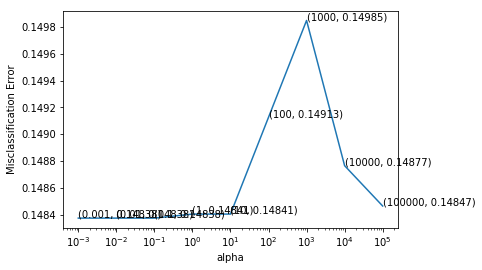

the misclassification error for each alpha value is :  [0.14838 0.14838 0.14838 0.14841 0.14841 0.14913 0.14985 0.14877 0.14847]
10 fold CV for alpha in range(10e-3, 10e+6) done! Time elapsed: 6.293203830718994 seconds


In [12]:
time_start = time.time()

# creating odd list of K for KNN
#myList = list(np.arrange(1,2,0.01))
#alpha = list(filter(lambda x: x % 2 != 0, myList))
#alpha = list(np.arange(0.1,10,0.1)) #alpha varies the most in this range.
alpha = [10**i for i in range(-3,6)]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for i in alpha:
    clf = BernoulliNB(alpha=i,binarize=0.1)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_alpha = alpha[MSE.index(min(MSE))]
print('\nThe optimal optimal_alpha is %f.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(alpha, MSE)

for xy in zip(alpha, np.round(MSE,5)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,5))

print ('10 fold CV for alpha in range(10e-3, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [13]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
alpha_optimal = BernoulliNB(alpha=optimal_alpha,binarize=0.1)

# fitting the model
alpha_optimal.fit(X_train, y_train)

# predict the response
pred = alpha_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Bernoulli for alpha = %f is %f%%' % (optimal_alpha, acc))


The accuracy of the Bernoulli for alpha = 0.001000 is 80.739230%


## Precision, recall, F1 score.

In [14]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.06963788 0.82363402]
recall: [0.00861772 0.97573556]
fscore: [0.01533742 0.89325619]
support: [ 2901 13765]


In [15]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.07      0.01      0.02      2901
    class 1       0.82      0.98      0.89     13765

avg / total       0.69      0.81      0.74     16666



## Confusion Matrix

In [16]:
#Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
print(__doc__)

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Automatically created module for IPython interactive environment


Confusion matrix, without normalization
[[   25  2876]
 [  334 13431]]


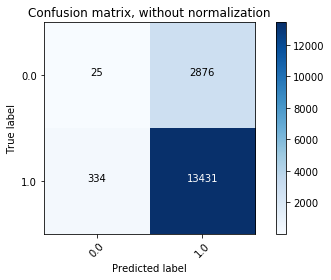

In [17]:
#Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

class_names=np.unique(y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

# 2. CV on Standardized data of Bigrams

In [18]:
openPickleFile("X_train_BOW_bigrams")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [19]:
openPickleFile("X_test_BOW_bigrams")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [20]:
unique_count(y_train)

array([[0.00e+00, 4.95e+03],
       [1.00e+00, 2.84e+04]])

In [21]:
def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

unique(y_test)

array([[0.00e+00, 2.90e+03],
       [1.00e+00, 1.38e+04]])

In [22]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()
from sklearn.naive_bayes import *
from sklearn.naive_bayes import BernoulliNB

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.33)
alpha = [10**i for i in range(-3,6)]

for i in alpha:
    # instantiate learning model (alpha = 30)
    clf = BernoulliNB(alpha=i,binarize=0.0,fit_prior=True,class_prior=None)
    
    #clf = BernoulliNB(alpha=i,binarize=0.1)

    # fitting the model on crossvalidation train
    clf.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = clf.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    
clf = BernoulliNB(alpha=0.001,binarize=0.1)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for alpha = 0.001 is %f%%' % (acc))

print ('CV for alpha in range(10e-3, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for alpha = 0.001000 is 85.474048%

CV accuracy for alpha = 0.010000 is 85.474048%

CV accuracy for alpha = 0.100000 is 85.474048%

CV accuracy for alpha = 1.000000 is 85.474048%

CV accuracy for alpha = 10.000000 is 85.483138%

CV accuracy for alpha = 100.000000 is 85.574039%

CV accuracy for alpha = 1000.000000 is 85.419507%

CV accuracy for alpha = 10000.000000 is 85.419507%

CV accuracy for alpha = 100000.000000 is 85.419507%

****Test accuracy for alpha = 0.001 is 80.421217%
CV for alpha in range(10e-3, 10e+6) done! Time elapsed: 0.6263058185577393 seconds


In [23]:
clf = BernoulliNB(alpha=1e+2)
clf.fit(X_tr,y_tr)
clf.predict_proba(X_tr)

array([[0.1 , 0.9 ],
       [0.39, 0.61],
       [0.08, 0.92],
       ...,
       [0.06, 0.94],
       [0.07, 0.93],
       [0.06, 0.94]])

### 10 fold cross validation 


The optimal optimal_alpha is 100.000000.


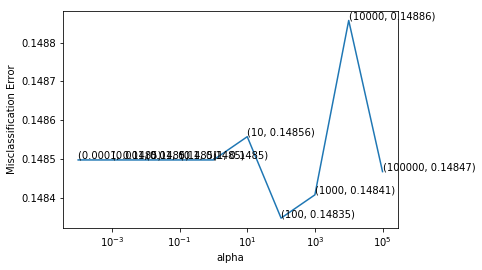

the misclassification error for each alpha value is :  [0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15]
10 fold CV for alpha in range(10e-4, 10e+6) done! Time elapsed: 6.854174852371216 seconds


In [24]:
time_start = time.time()

# creating odd list of K for KNN
#myList = list(np.arrange(1,2,0.01))
#alpha = list(filter(lambda x: x % 2 != 0, myList))
#alpha = list(np.arange(0.1,10,0.1)) #alpha varies the most in this range.
alpha = [10**i for i in range(-4,6)]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for i in alpha:
    clf = BernoulliNB(alpha=i,binarize=0.1)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_alpha = alpha[MSE.index(min(MSE))]
print('\nThe optimal optimal_alpha is %f.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(alpha, MSE)

for xy in zip(alpha, np.round(MSE,5)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,5))

print ('10 fold CV for alpha in range(10e-4, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [25]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
alpha_optimal = BernoulliNB(alpha=optimal_alpha,binarize=0.1)

# fitting the model
alpha_optimal.fit(X_train, y_train)

# predict the response
pred = alpha_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Bernoulli for alpha = %f is %f%%' % (optimal_alpha, acc))


The accuracy of the Bernoulli for alpha = 100.000000 is 80.283211%


In [26]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.1  0.82]
recall: [0.02 0.97]
fscore: [0.03 0.89]
support: [ 2901 13765]


In [27]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.10      0.02      0.03      2901
    class 1       0.82      0.97      0.89     13765

avg / total       0.70      0.80      0.74     16666



Confusion matrix, without normalization
[[   50  2851]
 [  435 13330]]


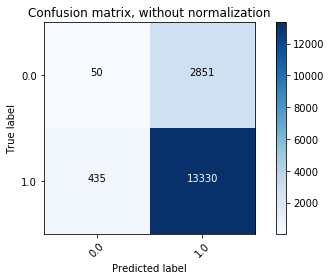

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

class_names=np.unique(y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

# 3. CV on Standardized data for TF-IDF

In [29]:
openPickleFile("X_train_tf_idf")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334, 50)
float64


In [30]:
openPickleFile("X_test_tf_idf")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(16666, 50)
float64


In [31]:
unique_count(y_train)

array([[0.00e+00, 4.95e+03],
       [1.00e+00, 2.84e+04]])

In [32]:
# split the train data set into cross validation train and cross validation test
time_start = time.time()
from sklearn.naive_bayes import *
from sklearn.naive_bayes import BernoulliNB

X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_train, y_train, test_size=0.33)
alpha = [10**i for i in range(-3,6)]

for i in alpha:
    # instantiate learning model (alpha = 30)
    clf = BernoulliNB(alpha=i,binarize=0.0,fit_prior=True,class_prior=None)
    
    #clf = BernoulliNB(alpha=i,binarize=0.1)

    # fitting the model on crossvalidation train
    clf.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = clf.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %f%%' % (i, acc))
    
clf = BernoulliNB(alpha=0.001,binarize=0.1)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for alpha = 0.001 is %f%%' % (acc))

print ('CV for alpha in range(10e-3, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))


CV accuracy for alpha = 0.001000 is 86.264885%

CV accuracy for alpha = 0.010000 is 86.264885%

CV accuracy for alpha = 0.100000 is 86.273975%

CV accuracy for alpha = 1.000000 is 86.273975%

CV accuracy for alpha = 10.000000 is 86.264885%

CV accuracy for alpha = 100.000000 is 86.210345%

CV accuracy for alpha = 1000.000000 is 85.764930%

CV accuracy for alpha = 10000.000000 is 85.028634%

CV accuracy for alpha = 100000.000000 is 85.028634%

****Test accuracy for alpha = 0.001 is 80.805232%
CV for alpha in range(10e-3, 10e+6) done! Time elapsed: 0.685166597366333 seconds


In [33]:
clf = BernoulliNB(alpha=1e-10)
clf.fit(X_tr,y_tr)
clf.predict_proba(X_tr)

array([[0.6 , 0.4 ],
       [0.04, 0.96],
       [0.17, 0.83],
       ...,
       [0.04, 0.96],
       [0.43, 0.57],
       [0.04, 0.96]])

### 10 fold cross validation 


The optimal optimal_alpha is 100.000000.


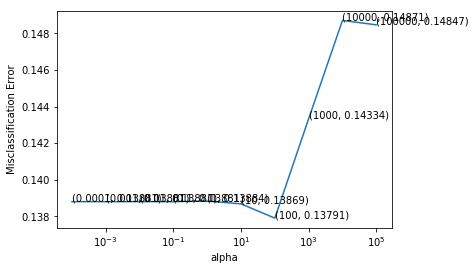

the misclassification error for each alpha value is :  [0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.15 0.15]
10 fold CV for alpha in range(10e-4, 10e+6) done! Time elapsed: 6.795823574066162 seconds


In [34]:
time_start = time.time()

# creating odd list of K for KNN
#myList = list(np.arrange(1,2,0.01))
#alpha = list(filter(lambda x: x % 2 != 0, myList))
#alpha = list(np.arange(0.1,10,0.1)) #alpha varies the most in this range.
alpha = [10**i for i in range(-4,6)]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for i in alpha:
    clf = BernoulliNB(alpha=i,binarize=0.1)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best alpha
optimal_alpha = alpha[MSE.index(min(MSE))]
print('\nThe optimal optimal_alpha is %f.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(alpha, MSE)

for xy in zip(alpha, np.round(MSE,5)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each alpha value is : ", np.round(MSE,5))

print ('10 fold CV for alpha in range(10e-4, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [35]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
alpha_optimal = BernoulliNB(alpha=optimal_alpha,binarize=0.1)

# fitting the model
alpha_optimal.fit(X_train, y_train)

# predict the response
pred = alpha_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Bernoulli for alpha = %f is %f%%' % (optimal_alpha, acc))


The accuracy of the Bernoulli for alpha = 100.000000 is 80.733229%


In [36]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.22 0.83]
recall: [0.04 0.97]
fscore: [0.07 0.89]
support: [ 2901 13765]


In [37]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.22      0.04      0.07      2901
    class 1       0.83      0.97      0.89     13765

avg / total       0.72      0.81      0.75     16666



Confusion matrix, without normalization
[[  121  2780]
 [  431 13334]]


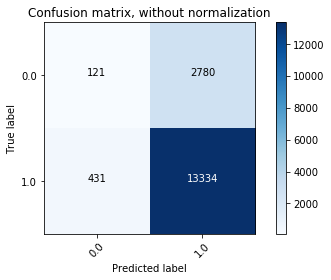

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

class_names=np.unique(y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

# 4. Feature importance or Top 25 most important words for BOW.

In [39]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(33334,)
object


## Top 25 Bigrams.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,2))
count_vect.fit_transform(X_train)

NB_optimal = BernoulliNB(alpha=1e+2)
NB_optimal.fit(X_tr, y_tr)
pred_proba = NB_optimal.predict_proba(X_tr)
#words = np.take(count_vect.get_feature_names(), pred_proba.argmax(axis=1))

neg_class_prob_sorted = NB_optimal.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = NB_optimal.feature_log_prob_[1, :].argsort()

print(np.take(count_vect.get_feature_names(), neg_class_prob_sorted[:25]))
print(np.take(count_vect.get_feature_names(), pos_class_prob_sorted[:25]))


['aaaaah satisfi' 'aaa spelt' 'aaa tue' 'aad' 'aaaa' 'aaaaaah' 'abandon'
 'aafco' 'aaa' 'aaah inhal' 'aachen printen' 'aauc' 'aafco certifi'
 'abandon one' 'aana' 'aaaaaah melt' 'abalon like' 'aagh' 'abandn pirat'
 'aachen munich' 'aback price' 'aagh yelp' 'aauc shelv' 'aafco profil'
 'aback']
['aaa spelt' 'aaa tue' 'aaaa' 'aaah miss' 'aaaaaah' 'aaaaawsom chump'
 'aaaahhhhhh' 'aaa' 'aana' 'aachen munich' 'aagh yelp' 'aaaahhhhhh must'
 'aaaaawsom' 'aaaaah' 'aaaaaah melt' 'abandon soft' 'abandon hair'
 'aachen printen' 'abandon human' 'aagh' 'aafco larg' 'aad sausag'
 'abandn' 'abalon' 'aback open']


# 5. Feature importance or Top 25 most important words for TFIDF.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer(ngram_range=(1,2))
count_vect.fit_transform(X_train)

NB_optimal = BernoulliNB(alpha=1e+2)
NB_optimal.fit(X_tr, y_tr)
pred_proba = NB_optimal.predict_proba(X_tr)
#words = np.take(count_vect.get_feature_names(), pred_proba.argmax(axis=1))

neg_class_prob_sorted = NB_optimal.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = NB_optimal.feature_log_prob_[1, :].argsort()
np.take
print(np.take(count_vect.get_feature_names(), neg_class_prob_sorted[:25]))
print(np.take(count_vect.get_feature_names(), pos_class_prob_sorted[:25]))

['aaaaah satisfi' 'aaa spelt' 'aaa tue' 'aad' 'aaaa' 'aaaaaah' 'abandon'
 'aafco' 'aaa' 'aaah inhal' 'aachen printen' 'aauc' 'aafco certifi'
 'abandon one' 'aana' 'aaaaaah melt' 'abalon like' 'aagh' 'abandn pirat'
 'aachen munich' 'aback price' 'aagh yelp' 'aauc shelv' 'aafco profil'
 'aback']
['aaa spelt' 'aaa tue' 'aaaa' 'aaah miss' 'aaaaaah' 'aaaaawsom chump'
 'aaaahhhhhh' 'aaa' 'aana' 'aachen munich' 'aagh yelp' 'aaaahhhhhh must'
 'aaaaawsom' 'aaaaah' 'aaaaaah melt' 'abandon soft' 'abandon hair'
 'aachen printen' 'abandon human' 'aagh' 'aafco larg' 'aad sausag'
 'abandn' 'abalon' 'aback open']
